In [9]:
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import ROOT as r
import array
import os
import sys
#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________

from PLOTTING import *
import CONFIG
from UTILITIES import *


# QuasiElastic Cuts

In [10]:
config="4"

In [11]:
W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")

print(f'W2min: {W2min}')
print(f'W2max: {W2max}')
print(f'dxmin: {dxmin}')
print(f'dxmax: {dxmax}')
print(f'dymin: {dymin}')
print(f'dymax: {dymax}')
print(f'dybgmin: {dybgmin}')
print(f'dybgmax: {dybgmax}')
print(f'Coin Min: {coinmin} Coin Max: {coinmax}')

W2min: -1
W2max: 2
dxmin: -0.303
dxmax: 0.306
dymin: -0.712
dymax: 1.011
dybgmin: -1.4
dybgmax: 1.4
Coin Min: 83.00159 Coin Max: 102.07001


In [12]:

fileDIR=(f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root")
resolved_path = os.path.abspath(fileDIR)
print(f"Resolved Path: {resolved_path}")
print(f"File Exists: {os.path.exists(resolved_path)}")


def dxy(rootfile):
    r.gErrorIgnoreLevel = r.kError  # Suppress Info and Warning messages
    # Create a TChain and add the input ROOT file
    chain = r.TChain("Tout")
    chain.Add(rootfile)
    bins=150
    # Create histograms
    h2 = r.TH2F("h2", "dX vs dY", bins, -4, 4, bins, -4, 4)
    h3 = r.TH2F("h3", "dX vs dY 0<W2<1.3", bins, -4, 4, bins, -4, 4)
    hdx=r.TH1F("hdx","$\Delta X$; $\Delta X$ (m); Entries",bins,-4,4)
    hdy=r.TH1F("hdy","$\Delta Y$; $\Delta Y$ (m); Entries",bins,-4,4)

    # Define variables to hold branch values using arrays
    dx = array.array('d', [0])
    dy = array.array('d', [0])
    W2 = array.array('d', [0])
    coin = array.array('d', [0])

    # Set branch addresses
    chain.SetBranchStatus("*", 0)
    chain.SetBranchStatus("dx", 1)
    chain.SetBranchStatus("dy", 1)
    chain.SetBranchStatus("W2", 1)
    chain.SetBranchStatus("coin_time", 1)

    chain.SetBranchAddress("dx", dx)
    chain.SetBranchAddress("dy", dy)
    chain.SetBranchAddress("W2", W2)
    chain.SetBranchAddress("coin_time", coin)

    # Loop over all entries and fill histograms
    nEntries = chain.GetEntries()
    print(nEntries)
    for i in range(nEntries):
        chain.GetEntry(i)
        h2.Fill(dy[0], dx[0])
        W2cut=0 < W2[0] < 1
        coincut=coinmin<coin[0]<coinmax
        xcut=dxmin<dx[0]<dxmax
        if W2cut and coincut:
            h3.Fill(dy[0], dx[0])
            hdx.Fill(dx[0])
        if W2cut and coincut and xcut:
            hdy.Fill(dy[0])

    # Write histograms to the file
    h2.Write()
    h3.Write()

    # Create a canvas and save the histogram as an image
    c2 = r.TCanvas("c2", "dX vs dY", 1000, 1000)
    r.gStyle.SetPalette(r.kRainBow)
    h2.Draw("colz")
    #c2.SaveAs("../plots/dxdy.png")

    # Create another canvas and save the second histogram as an image
    c3 = r.TCanvas("c3", "dX vs dY 0<W2<1.3", 1000, 1000)
    h3.Draw("colz")
    r.gStyle.SetPalette(r.kRainBow)
    #c3.SaveAs("../plots/dxdyCut.png")

    print("it worked")
    return h2, h3,Function_HIST2NP(hdx),Function_HIST2NP(hdy)
# Example usage


Resolved Path: /home/research/GEn/GEn Data Analysis/outfiles/Pass1/QE_data_GEN4_sbs100p_nucleon_np_model2.root
File Exists: True


In [13]:
h2,h3,hdx,hdy=dxy(fileDIR)

8220490
it worked


Error in <TROOT::WriteTObject>: The current directory (PyROOT) is not associated with a file. The object (h2) has not been written.
Error in <TROOT::WriteTObject>: The current directory (PyROOT) is not associated with a file. The object (h3) has not been written.


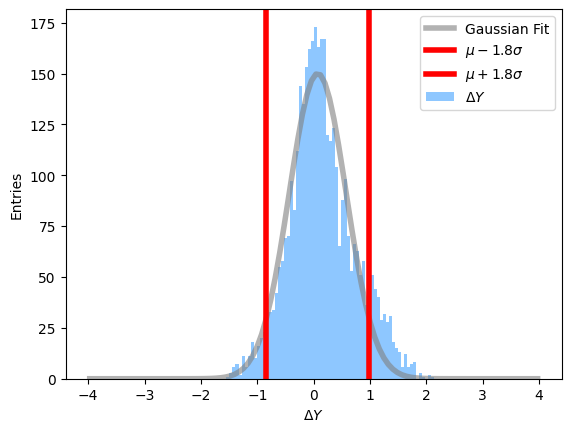

Mean: 0.0721, Standard Deviation (Sigma): 0.506579020727084
Number of events within ±1.8 sigma: 3229.0
dymin: -0.84
dymax: 0.984


In [14]:
bin_centers,bin_contents=hdy
sigcut=1.8
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

initial_guess = [max(bin_contents), bin_centers[np.argmax(bin_contents)], 1.0]

popt, pcov = curve_fit(gaussian, bin_centers, bin_contents, p0=initial_guess)

amplitude, mean, stddev = popt

plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.5, color="dodgerblue", label="$\Delta Y$")
x_fit = np.linspace(min(bin_centers), max(bin_centers), 100)
y_fit = gaussian(x_fit, *popt)
plt.plot(x_fit, y_fit, color='grey', linewidth=4,alpha=.6, label='Gaussian Fit')
plt.axvline(mean -sigcut * stddev, color='red', linewidth=4, label=f'$\mu - {sigcut}\sigma$')
plt.axvline(mean + sigcut * stddev, color='red', linewidth=4, label=f'$\mu + {sigcut}\sigma$')

plt.xlabel('$\Delta Y$')
plt.ylabel('Entries')
plt.legend()
plt.show()
lower_bound = mean -sigcut * stddev
upper_bound = mean + sigcut * stddev
dymin=lower_bound
dymax=upper_bound
within_3sigma = np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])
print(f"Mean: {np.round(mean,4)}, Standard Deviation (Sigma): {stddev}")
print(f"Number of events within ±{sigcut} sigma: {np.round(within_3sigma,4)}")
print(f'dymin: {np.round(lower_bound,3)}')
print(f'dymax: {np.round(upper_bound,3)}')

(-4.0, 2.0)

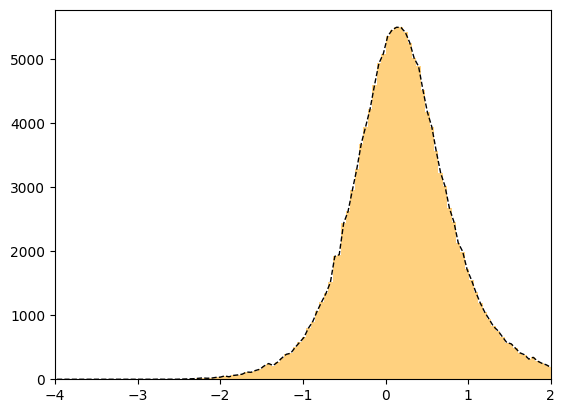

In [8]:
lw=1
#____________Total Fit = SimP + SimN + Background___________________________________________________________
bin_centers,bin_contents=hdy
plt.bar(bin_centers, bin_contents, width=(bin_centers[1] - bin_centers[0]), align='center', alpha=0.5,color='orange',label="Total Fit = bg+simN+simP")
plt.plot(bin_centers, bin_contents,'--',color='black',linewidth=lw)
plt.xlim((-4,2))
#___________________________________________________________________________________________________________